In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import scipy
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
#from scipy import random
from scipy.stats import norm
import warnings
from itertools import repeat
warnings.filterwarnings("ignore", category=DeprecationWarning)
plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn

# Cono de Winston 

In [3]:
df1 = pd.read_csv("winston_cone_f.csv", sep = ',')  # sep = ',' sirve para separar en 2 columnas el excel leido.

In [3]:
df1 = pd.read_csv("wea.csv", sep = ',')  # sep = ',' sirve para separar en 2 columnas el excel leido.

In [12]:
df1.min()

Tiempo (ns)    0.000000
Rayo 1         3.363247
Rayo 2         3.363224
Rayo 3         3.363242
Rayo 4         3.363241
                 ...   
Rayo 1996      2.206379
Rayo 1997      0.005754
Rayo 1998      1.470466
Rayo 1999      0.774288
Rayo 2000      0.027679
Length: 2001, dtype: float64

In [5]:
df1.iloc[[3088]]

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
3088,0.3088,3.363254,3.36324,3.363255,3.363243,3.36322,3.363218,3.363215,3.36322,3.363214,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
lista_1=df1.iloc[[3088]].mean()

In [7]:
lista_1

Tiempo (ns)    0.308800
Rayo 1         3.363254
Rayo 2         3.363240
Rayo 3         3.363255
Rayo 4         3.363243
                 ...   
Rayo 1996           NaN
Rayo 1997           NaN
Rayo 1998           NaN
Rayo 1999           NaN
Rayo 2000           NaN
Length: 2001, dtype: float64

In [8]:
df_1 = pd.DataFrame()

In [9]:
df_1['List1']=lista_1

In [10]:
df_1= df_1.drop(df_1.index[[0]])

In [11]:
df_1

,List1
Rayo 1,3.363254
Rayo 2,3.363240
Rayo 3,3.363255
Rayo 4,3.363243
Rayo 5,3.363220
...,...
Rayo 1996,NaN
Rayo 1997,NaN
Rayo 1998,NaN
Rayo 1999,NaN


In [12]:
df_1.isnull().sum().sum()

431

## Valor promedio de los 200 rayos al llegar al detector

In [13]:
df_1['List1'].sum()

5202.145464272817

In [14]:
Winston=5202.145464272817/2000

In [15]:
Winston

2.601072732136408

# Cono de Winston_mod

In [1141]:
df2 = pd.read_csv("winston_cone_mod_f.csv", sep = ',')  # sep = ',' sirve para separar en 2 columnas el excel leido.

In [1142]:
df2

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
0,0.0000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
1,0.0001,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,...,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346
2,0.0002,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,...,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691
3,0.0003,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,...,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037
4,0.0004,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,...,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3181,0.3181,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.251932
3182,0.3182,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.251932
3183,0.3183,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.251932
3184,0.3184,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.251932


In [1143]:
df2.tail(10)

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
3176,0.3176,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.251932
3177,0.3177,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.251932
3178,0.3178,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.251932
3179,0.3179,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.251932
3180,0.3180,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.251932
3181,0.3181,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.251932
3182,0.3182,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.251932
3183,0.3183,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.251932
3184,0.3184,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.251932
3185,0.3185,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.251932


In [1145]:
df2.iloc[[3185]]

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
3185,0.3185,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.251932


In [1148]:
lista_2=df2.iloc[[3185]].mean()

In [1149]:
lista_2

Tiempo (ns)    0.318500
Rayo 1         3.363261
Rayo 2         3.363236
Rayo 3         3.363242
Rayo 4         3.363248
                 ...   
Rayo 1996           NaN
Rayo 1997           NaN
Rayo 1998           NaN
Rayo 1999           NaN
Rayo 2000      3.251932
Length: 2001, dtype: float64

In [1151]:
df_2 = pd.DataFrame()

In [1152]:
df_2['List2']=lista_2

In [1153]:
df_2= df_2.drop(df_2.index[[0]])

In [1154]:
df_2

,List2
Rayo 1,3.363261
Rayo 2,3.363236
Rayo 3,3.363242
Rayo 4,3.363248
Rayo 5,3.363246
...,...
Rayo 1996,NaN
Rayo 1997,NaN
Rayo 1998,NaN
Rayo 1999,NaN


## Valor promedio de los 200 rayos al llegar al detector

In [1156]:
df_2['List2'].sum()

6000.080892483977

In [1157]:
Winston_mod=6000.080892483977/2000

In [1158]:
Winston_mod

3.0000404462419885

## Barra

In [336]:
df1['Rayo 1'][0],df2['Rayo 1'][0], df3['Rayo 1'][0] 

(4.999999999999968, 5.000000000000088, 4.999999999999948)

In [1161]:
df3 = pd.read_csv("barra_f_2.csv", sep = ',')  # sep = ',' sirve para separar en 2 columnas el excel leido.

In [3]:
df3_3 = pd.read_csv("barra_VF.csv", sep = ',')  # sep = ',' sirve para separar en 2 columnas el excel leido.

In [6]:
df3_3

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
0,0.000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
1,0.001,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,...,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460,4.993460
2,0.002,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,...,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928,4.986928
3,0.003,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,...,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405,4.980405
4,0.004,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,...,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890,4.973890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,4.996,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,0.636731,0.636743,NaN,NaN,NaN,0.121032,NaN
4997,4.997,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,0.636731,0.636743,NaN,NaN,NaN,0.121032,NaN
4998,4.998,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,0.636731,0.636743,NaN,NaN,NaN,0.121032,NaN
4999,4.999,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,0.636731,0.636743,NaN,NaN,NaN,0.121032,NaN


: 

In [5]:
df3_3.min()

Tiempo (ns)    0.000000
Rayo 1         3.363247
Rayo 2         3.363224
Rayo 3         3.363242
Rayo 4         3.363241
                 ...   
Rayo 1996      2.203493
Rayo 1997      0.547344
Rayo 1998      0.162875
Rayo 1999      0.121032
Rayo 2000      2.215060
Length: 2001, dtype: float64

In [1613]:
df3

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
0,0.0000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
1,0.0001,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,...,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346
2,0.0002,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,...,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691
3,0.0003,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,...,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037
4,0.0004,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,...,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3056,0.3056,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,3.329712,3.329712,3.329712,3.329712,3.329712,3.329712,3.329712,3.329712,3.329712,3.329712
3057,0.3057,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,3.329276,3.329276,3.329276,3.329276,3.329276,3.329276,3.329276,3.329276,3.329276,3.329276
3058,0.3058,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,3.328840,3.328840,3.328840,3.328840,3.328840,3.328840,3.328840,3.328840,3.328840,3.328840
3059,0.3059,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [745]:
p1 = df1.nunique()
print(p1)

Tiempo (ns)    3089
Rayo 1         3031
Rayo 2         3031
Rayo 3         3031
Rayo 4         3031
               ... 
Rayo 1706      3083
Rayo 1707      3083
Rayo 1708      3082
Rayo 1709      3083
Rayo 1710      3083
Length: 1570, dtype: int64


In [677]:
df1[['Tiempo (ns)','Rayo 1505']][2000:2030]

,Tiempo (ns),Rayo 1505
2000,0.2000,3.848399
2001,0.2001,3.847896
2002,0.2002,3.847392
2003,0.2003,3.846888
2004,0.2004,3.846385
2005,0.2005,3.845882
2006,0.2006,3.845378
2007,0.2007,3.844875
2008,0.2008,3.844372
2009,0.2009,3.843869


In [729]:
df1=df1.dropna(axis=1)

In [730]:
df1

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1578,Rayo 1702,Rayo 1703,Rayo 1704,Rayo 1705,Rayo 1706,Rayo 1707,Rayo 1708,Rayo 1709,Rayo 1710
0,0.0000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
1,0.0001,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,...,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346
2,0.0002,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,...,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691
3,0.0003,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,...,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037
4,0.0004,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,...,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084,0.3084,3.363254,3.363240,3.363255,3.363243,3.363220,3.363218,3.363215,3.363220,3.363214,...,3.299231,3.296834,3.297003,3.297327,3.297158,3.297086,3.296985,3.297170,3.297036,3.296788
3085,0.3085,3.363254,3.363240,3.363255,3.363243,3.363220,3.363218,3.363215,3.363220,3.363214,...,3.299231,3.296834,3.297003,3.297327,3.297158,3.297086,3.296985,3.297170,3.297036,3.296788
3086,0.3086,3.363254,3.363240,3.363255,3.363243,3.363220,3.363218,3.363215,3.363220,3.363214,...,3.299231,3.296834,3.297003,3.297327,3.297158,3.297086,3.296985,3.297170,3.297036,3.296788
3087,0.3087,3.363254,3.363240,3.363255,3.363243,3.363220,3.363218,3.363215,3.363220,3.363214,...,3.299231,3.296834,3.297003,3.297327,3.297158,3.297086,3.296985,3.297170,3.297036,3.296788


In [731]:
df2

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
0,0.0000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
1,0.0001,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,...,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346
2,0.0002,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,...,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691
3,0.0003,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,...,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037
4,0.0004,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,...,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3181,0.3181,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.251932
3182,0.3182,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.251932
3183,0.3183,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.251932
3184,0.3184,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.251932


In [732]:
df2=df2.dropna(axis=1)

In [733]:
df2

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1970,Rayo 1971,Rayo 1972,Rayo 1973,Rayo 1974,Rayo 1975,Rayo 1976,Rayo 1977,Rayo 1978,Rayo 2000
0,0.0000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
1,0.0001,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,...,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346
2,0.0002,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,...,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691
3,0.0003,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,...,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037
4,0.0004,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,...,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3181,0.3181,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,3.291317,3.291217,3.265956,3.261811,3.258916,3.257082,3.254792,3.252503,3.251367,3.251932
3182,0.3182,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,3.291317,3.291217,3.265956,3.261811,3.258916,3.257082,3.254792,3.252503,3.251367,3.251932
3183,0.3183,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,3.291317,3.291217,3.265956,3.261811,3.258916,3.257082,3.254792,3.252503,3.251367,3.251932
3184,0.3184,3.363261,3.363236,3.363242,3.363248,3.363246,3.363238,3.363181,3.363188,3.363194,...,3.291317,3.291217,3.265956,3.261811,3.258916,3.257082,3.254792,3.252503,3.251367,3.251932


In [734]:
df3

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
0,0.0000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
1,0.0001,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,...,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346
2,0.0002,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,...,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691
3,0.0003,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,...,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037
4,0.0004,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,...,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3056,0.3056,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,3.329712,3.329712,3.329712,3.329712,3.329712,3.329712,3.329712,3.329712,3.329712,3.329712
3057,0.3057,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,3.329276,3.329276,3.329276,3.329276,3.329276,3.329276,3.329276,3.329276,3.329276,3.329276
3058,0.3058,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,3.328840,3.328840,3.328840,3.328840,3.328840,3.328840,3.328840,3.328840,3.328840,3.328840
3059,0.3059,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [735]:
df3=df3.dropna(axis=1)

In [736]:
df3

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 77,Rayo 78,Rayo 83,Rayo 84,Rayo 85,Rayo 88,Rayo 97,Rayo 105,Rayo 106,Rayo 114
0,0.0000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
1,0.0001,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,...,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346,4.999346
2,0.0002,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,...,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691,4.998691
3,0.0003,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,...,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037
4,0.0004,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,...,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383,4.997383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3056,0.3056,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,3.362807,3.362789,3.362713,3.362706,3.362703,3.362489,3.362552,3.362668,3.362674,3.362616
3057,0.3057,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,3.362807,3.362789,3.362713,3.362706,3.362703,3.362489,3.362552,3.362668,3.362674,3.362616
3058,0.3058,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,3.362807,3.362789,3.362713,3.362706,3.362703,3.362489,3.362552,3.362668,3.362674,3.362616
3059,0.3059,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,3.362807,3.362789,3.362713,3.362706,3.362703,3.362489,3.362552,3.362668,3.362674,3.362616


In [747]:
p2 = df2.nunique()
print(p2)

Tiempo (ns)    3186
Rayo 1         3031
Rayo 2         3031
Rayo 3         3031
Rayo 4         3031
               ... 
Rayo 1975      3126
Rayo 1976      3131
Rayo 1977      3137
Rayo 1978      3139
Rayo 2000      3138
Length: 1824, dtype: int64


In [750]:
p = df3.nunique()
print(p)

Tiempo (ns)    3061
Rayo 1         3031
Rayo 2         3031
Rayo 3         3031
Rayo 4         3031
               ... 
Rayo 88        3033
Rayo 97        3033
Rayo 105       3032
Rayo 106       3032
Rayo 114       3032
Length: 82, dtype: int64


In [829]:
lista_ind_1=[]
for i in range(1570):
    val_indice1=p1[i]-1
    lista_ind_1.append(df1['Tiempo (ns)'][val_indice1])
    i=i+1

In [830]:
lista_ind_1 = (lista_ind_1 + 2001 * [0])[:2001]

In [831]:
lista_ind_2=[]
for i in range(1824):
    val_indice2=p2[i]-1
    lista_ind_2.append(df2['Tiempo (ns)'][val_indice2])
    i=i+1

In [832]:
lista_ind_2 = (lista_ind_2 + 2001 * [0])[:2001]

In [833]:
lista_ind=[]
for i in range(82):
    val_indice=p[i]-1
    lista_ind.append(df3['Tiempo (ns)'][val_indice])
    i=i+1

In [834]:
lista_ind = (lista_ind+ 2001 * [0])[:2001]

In [835]:
df_t = pd.DataFrame()

In [836]:
df_t['Tiempo de llegada Winston Cone']=lista_ind_1
df_t['Tiempo de llegada Winston Cone_mod']=lista_ind_2
df_t['Tiempo de llegada Barra']=lista_ind

In [838]:
df_t= df_t.drop(df_t.index[[0]])

In [849]:
df_t

,Tiempo de llegada Winston Cone,Tiempo de llegada Winston Cone_mod,Tiempo de llegada Barra
1,0.303,0.303,0.303
2,0.303,0.303,0.303
3,0.303,0.303,0.303
4,0.303,0.303,0.303
5,0.303,0.303,0.303
...,...,...,...
1996,0.000,0.000,0.000
1997,0.000,0.000,0.000
1998,0.000,0.000,0.000
1999,0.000,0.000,0.000


## Grafico tiempo de llegada al detector para distintas geometrias

In [966]:
df_t.min()

Tiempo de llegada Winston Cone        0.0
Tiempo de llegada Winston Cone_mod    0.0
Tiempo de llegada Barra               0.0
dtype: float64

C:\Users\ccana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


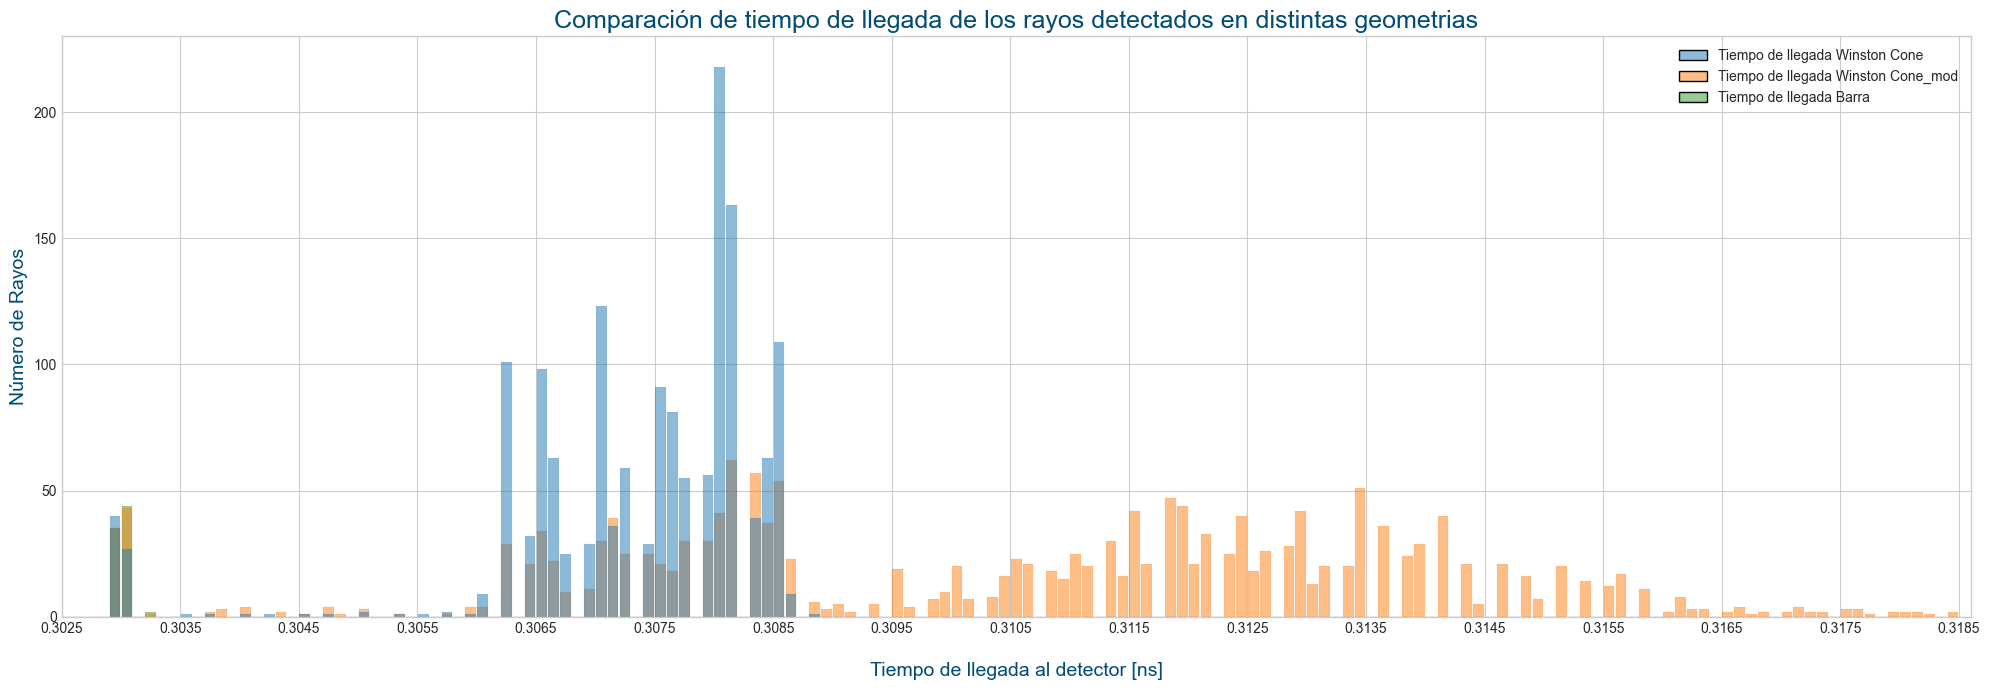

In [967]:
plt.figure(figsize = (20,7))
sns.histplot(df_t,bins=100,shrink=0.9,binwidth=0.0001)
plt.xlim(0.3025,0.3186)
plt.ylim(0,230)
plt.xticks(np.arange(0.3025,0.3186, 0.001))
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'
plt.xlabel('\nTiempo de llegada al detector [ns]', c=txt_color2, fontsize=14)
plt.ylabel('Número de Rayos', c=txt_color2, fontsize=14)
plt.title('Comparación de tiempo de llegada de los rayos detectados en distintas geometrias',fontsize=18,loc='center', c=txt_color2)
plt.tight_layout()


In [1162]:
df3.iloc[[3060]]

,Tiempo (ns),Rayo 1,Rayo 2,Rayo 3,Rayo 4,Rayo 5,Rayo 6,Rayo 7,Rayo 8,Rayo 9,...,Rayo 1991,Rayo 1992,Rayo 1993,Rayo 1994,Rayo 1995,Rayo 1996,Rayo 1997,Rayo 1998,Rayo 1999,Rayo 2000
3060,0.306,3.363247,3.363224,3.363242,3.363241,3.363222,3.363212,3.363191,3.363202,3.363205,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1163]:
lista_3=df3.iloc[[3060]].mean()

In [1164]:
lista_3

Tiempo (ns)    0.306000
Rayo 1         3.363247
Rayo 2         3.363224
Rayo 3         3.363242
Rayo 4         3.363241
                 ...   
Rayo 1996           NaN
Rayo 1997           NaN
Rayo 1998           NaN
Rayo 1999           NaN
Rayo 2000           NaN
Length: 2001, dtype: float64

In [1165]:
df_3 = pd.DataFrame()

In [1166]:
df_3['List3']=lista_3

In [1167]:
df_3= df_3.drop(df_3.index[[0]])

In [1411]:
df_3.sum()

List3    272.401141
dtype: float64

In [1412]:
272.401141/2000

0.1362005705

In [1168]:
df_3

,List3
Rayo 1,3.363247
Rayo 2,3.363224
Rayo 3,3.363242
Rayo 4,3.363241
Rayo 5,3.363222
...,...
Rayo 1996,NaN
Rayo 1997,NaN
Rayo 1998,NaN
Rayo 1999,NaN


In [1413]:
df_3['List3'].sum()

272.40114071613834

In [1414]:
Barra=272.40114071613834/2000

In [1415]:
Barra

0.13620057035806918

In [1435]:
df_=pd.DataFrame()

In [1436]:
df_['Winston_Cone']=df_1
df_['Winston_Cone_mod']=df_2
df_['Barra_Simple']=df_3


In [1437]:
df_

,Winston_Cone,Winston_Cone_mod,Barra_Simple
Rayo 1,3.363254,3.363261,3.363247
Rayo 2,3.363240,3.363236,3.363224
Rayo 3,3.363255,3.363242,3.363242
Rayo 4,3.363243,3.363248,3.363241
Rayo 5,3.363220,3.363246,3.363222
...,...,...,...
Rayo 1996,NaN,NaN,NaN
Rayo 1997,NaN,NaN,NaN
Rayo 1998,NaN,NaN,NaN
Rayo 1999,NaN,NaN,NaN


In [1175]:
data = pd.DataFrame()

In [1177]:
data['Winston_Cone']=lista_1
data['Winston_Cone_mod']=lista_2
data['Barra_Simple']=lista_3

In [1178]:
data

,Winston_Cone,Winston_Cone_mod,Barra_Simple
Tiempo (ns),0.308800,0.318500,0.306000
Rayo 1,3.363254,3.363261,3.363247
Rayo 2,3.363240,3.363236,3.363224
Rayo 3,3.363255,3.363242,3.363242
Rayo 4,3.363243,3.363248,3.363241
...,...,...,...
Rayo 1996,NaN,NaN,NaN
Rayo 1997,NaN,NaN,NaN
Rayo 1998,NaN,NaN,NaN
Rayo 1999,NaN,NaN,NaN


In [1179]:
data=data.drop(data.index[[0]])

### Dataframe de las 3 geometrias sin valores nan

In [1180]:
data

,Winston_Cone,Winston_Cone_mod,Barra_Simple
Rayo 1,3.363254,3.363261,3.363247
Rayo 2,3.363240,3.363236,3.363224
Rayo 3,3.363255,3.363242,3.363242
Rayo 4,3.363243,3.363248,3.363241
Rayo 5,3.363220,3.363246,3.363222
...,...,...,...
Rayo 1996,NaN,NaN,NaN
Rayo 1997,NaN,NaN,NaN
Rayo 1998,NaN,NaN,NaN
Rayo 1999,NaN,NaN,NaN


In [1181]:
data['Winston_Cone'].isnull().sum(),data['Winston_Cone_mod'].isnull().sum(),data['Barra_Simple'].isnull().sum()

(431, 177, 1919)

In [278]:
data = data.dropna(how='all')

In [1183]:
data = data.fillna(0)

## Desviación Estandar Winston_Cone

### mean and std incorrect

In [1182]:
data.describe()

,Winston_Cone,Winston_Cone_mod,Barra_Simple
count,1569.000000,1823.000000,81.000000
mean,3.315580,3.291322,3.362977
std,0.015216,0.028167,0.000175
min,3.296500,3.242314,3.362489
25%,3.299082,3.271043,3.362861
50%,3.318647,3.283848,3.363000
75%,3.324172,3.317697,3.363122
max,3.363255,3.363261,3.363247


In [1184]:
data.describe()

,Winston_Cone,Winston_Cone_mod,Barra_Simple
count,2000.000000,2000.000000,2000.000000
mean,2.601073,3.000040,0.136201
std,1.363671,0.935424,0.663105
min,0.000000,0.000000,0.000000
25%,3.297047,3.264660,0.000000
50%,3.316651,3.281750,0.000000
75%,3.322536,3.316811,0.000000
max,3.363255,3.363261,3.363247


In [1188]:
prom1=data['Winston_Cone'].mean()

In [1189]:
prom1

2.601072732136408

In [1341]:
nu1=[]

In [1342]:
data['Winston_Cone'].value_counts()

0.000000    431
3.363254      1
3.304305      1
3.304613      1
3.304774      1
           ... 
3.321244      1
3.321190      1
3.319588      1
3.319915      1
3.296788      1
Name: Winston_Cone, Length: 1570, dtype: int64

In [1346]:
nu1=[]
for i in range(2000):
    N1=(data['Winston_Cone'][i]-prom1)**2
    nu1.append(N1)
    i=i+1

In [1347]:
df_desv1 = pd.DataFrame()

In [1348]:
df_desv1['numerador']=nu1

In [1364]:
df_desv1.value_counts()

numerador
0.000000     431
0.520404       1
0.520393       1
0.520376       1
0.520376       1
            ... 
0.492118       1
0.492059       1
0.492001       1
0.491835       1
0.580922       1
Length: 1570, dtype: int64

In [1207]:
df_desv1['numerador'][1999]

6.765579357863559

In [1358]:
for i in range(2000):
    if df_desv1['numerador'][i]== 6.765579357863559:
        df_desv1['numerador'][i]=0
        i=i+i

In [1389]:
df_desv1

,numerador
0,0.580920
1,0.580899
2,0.580922
3,0.580904
4,0.580869
...,...
1995,0.000000
1996,0.000000
1997,0.000000
1998,0.000000


In [1394]:
df_desv1.sum()

numerador    801.370567
dtype: float64

In [1391]:
Desviación_estandar_Winston_Cone=801.370567/1569

In [1454]:
Desviación_estandar_Winston_Cone

0.5107524327597196

In [1455]:
Desviación_Estandar_Winston_Cone=np.sqrt(Desviación_estandar_Winston_Cone)

In [1456]:
Desviación_Estandar_Winston_Cone

0.7146694569937347

## Desviacion estandar Winston_Cone_mod

In [1375]:
data

,Winston_Cone,Winston_Cone_mod,Barra_Simple
Rayo 1,3.363254,3.363261,3.363247
Rayo 2,3.363240,3.363236,3.363224
Rayo 3,3.363255,3.363242,3.363242
Rayo 4,3.363243,3.363248,3.363241
Rayo 5,3.363220,3.363246,3.363222
...,...,...,...
Rayo 1996,0.000000,0.000000,0.000000
Rayo 1997,0.000000,0.000000,0.000000
Rayo 1998,0.000000,0.000000,0.000000
Rayo 1999,0.000000,0.000000,0.000000


In [1376]:
prom2=data['Winston_Cone_mod'].mean()

In [1408]:
prom2

3.0000404462419885

In [1378]:
nu2=[]
for i in range(2000):
    N2=(data['Winston_Cone_mod'][i]-prom2)**2
    nu2.append(N2)
    i=i+1

In [1379]:
df_desv2= pd.DataFrame()

In [1380]:
df_desv2['numerador2']=nu2

In [1381]:
df_desv2

,numerador2
0,0.131929
1,0.131911
2,0.131915
3,0.131920
4,0.131918
...,...
1995,9.000243
1996,9.000243
1997,9.000243
1998,9.000243


In [1383]:
df_desv2.value_counts()

numerador2
9.000243      177
0.090511        1
0.090481        1
0.090462        1
0.090355        1
             ... 
0.076517        1
0.076486        1
0.076473        1
0.076469        1
0.080558        1
Length: 1824, dtype: int64

In [1384]:
df_desv2['numerador2'][1998]

9.00024267908783

In [1385]:
for i in range(2000):
    if df_desv2['numerador2'][i]== 9.00024267908783:
        df_desv2['numerador2'][i]=0
        i=i+i

In [1395]:
df_desv2.sum()

numerador2    156.118342
dtype: float64

In [1396]:
Desviación_estandar_Winston_Cone_mod=156.118342/1823

In [1397]:
Desviación_estandar_Winston_Cone_mod

0.08563814701042238

In [1457]:
Desviación_Estandar_Winston_Cone_mod=np.sqrt(Desviación_estandar_Winston_Cone_mod)

In [1458]:
Desviación_Estandar_Winston_Cone_mod

0.29263996140380827

## Desviación estandar Barra_Simple

In [1404]:
data['Barra_Simple'].value_counts()

0.000000    1919
3.363247       1
3.362779       1
3.362745       1
3.362920       1
            ... 
3.363074       1
3.363092       1
3.363108       1
3.363120       1
3.362616       1
Name: Barra_Simple, Length: 82, dtype: int64

In [1398]:
data

,Winston_Cone,Winston_Cone_mod,Barra_Simple
Rayo 1,3.363254,3.363261,3.363247
Rayo 2,3.363240,3.363236,3.363224
Rayo 3,3.363255,3.363242,3.363242
Rayo 4,3.363243,3.363248,3.363241
Rayo 5,3.363220,3.363246,3.363222
...,...,...,...
Rayo 1996,0.000000,0.000000,0.000000
Rayo 1997,0.000000,0.000000,0.000000
Rayo 1998,0.000000,0.000000,0.000000
Rayo 1999,0.000000,0.000000,0.000000


In [1399]:
prom3=data['Barra_Simple'].mean()

In [1402]:
prom3

0.13620057035806918

In [1441]:
nu3=[]
for i in range(2000):
    N3=(data['Barra_Simple'][i]-prom3)**2
    nu3.append(N3)
    i=i+1

In [1442]:
df_desv3= pd.DataFrame()

In [1443]:
df_desv3['numerador3']=nu3

In [1445]:
df_desv3

,numerador3
0,10.413827
1,10.413681
2,10.413795
3,10.413788
4,10.413670
...,...
1995,0.018551
1996,0.018551
1997,0.018551
1998,0.018551


In [1446]:
df_desv3.value_counts()

numerador3
0.018551      1919
10.413023        1
10.412949        1
10.412931        1
10.412848        1
              ... 
10.411516        1
10.411512        1
10.411498        1
10.411360        1
10.413827        1
Length: 82, dtype: int64

In [1447]:
df_desv3['numerador3'][1999]

0.018550595365863353

In [1448]:
for i in range(2000):
    if df_desv3['numerador3'][i]== 0.018550595365863353:
        df_desv3['numerador3'][i]=0
        i=i+i

In [1449]:
df_desv3.sum()

numerador3    843.379003
dtype: float64

In [1450]:
Desviación_estandar_Barra_Simple=843.3790032/81

In [1451]:
Desviación_estandar_Barra_Simple

10.41208645925926

In [1459]:
Desviación_Estandar_Barra_Simple=np.sqrt(Desviación_estandar_Barra_Simple)

In [1466]:
Desviación_Estandar_Barra_Simple

3.226776481143257

In [1481]:
Desviación_Winston_Cone=[0.7146694569937347]

In [1482]:
Desviación_Winston_Cone_mod=0.29263996140380827

In [1484]:
Desviación_Barra_Simple=3.226776481143257

In [1467]:
df_desviacion= pd.DataFrame()

In [1485]:
df_desviacion['Desviación Winston Cone']=Desviación_Winston_Cone
df_desviacion['Desviación Winston Cone mod']=Desviación_Winston_Cone_mod
df_desviacion['Desviación Barra Simple']=Desviación_Barra_Simple

In [1486]:
df_desviacion

,Desviación Winston Cone,Desviación Winston Cone mod,Desviación Barra Simple
0,0.714669,0.29264,3.226776


## Energía como fotones

#### Energía inicial de cada rayo (5w)  corresponde al 100% de fotones, suponiendo 1000 fotones por rayo (2.000.000 de fotones totales) 

In [1492]:
df_

,Winston_Cone,Winston_Cone_mod,Barra_Simple
Rayo 1,3.363254,3.363261,3.363247
Rayo 2,3.363240,3.363236,3.363224
Rayo 3,3.363255,3.363242,3.363242
Rayo 4,3.363243,3.363248,3.363241
Rayo 5,3.363220,3.363246,3.363222
...,...,...,...
Rayo 1996,NaN,NaN,NaN
Rayo 1997,NaN,NaN,NaN
Rayo 1998,NaN,NaN,NaN
Rayo 1999,NaN,NaN,NaN


In [1493]:
data

,Winston_Cone,Winston_Cone_mod,Barra_Simple
Rayo 1,3.363254,3.363261,3.363247
Rayo 2,3.363240,3.363236,3.363224
Rayo 3,3.363255,3.363242,3.363242
Rayo 4,3.363243,3.363248,3.363241
Rayo 5,3.363220,3.363246,3.363222
...,...,...,...
Rayo 1996,0.000000,0.000000,0.000000
Rayo 1997,0.000000,0.000000,0.000000
Rayo 1998,0.000000,0.000000,0.000000
Rayo 1999,0.000000,0.000000,0.000000


In [1553]:
lista_valor1=[]
for i in range(2000):
    valor1=(data['Winston_Cone'][i]*1000)/5
    lista_valor1.append(valor1)
    i=i+i

In [1554]:
lista_valor2=[]
for i in range(2000):
    valor2=(data['Winston_Cone_mod'][i]*1000)/5
    lista_valor2.append(valor2)
    i=i+i

In [1555]:
lista_valor3=[]
for i in range(2000):
    valor3=(data['Barra_Simple'][i]*1000)/5
    lista_valor3.append(valor3)
    i=i+i

In [1556]:
df_fotones = pd.DataFrame()

In [1557]:
rayos=[]

for k in range(1,2001):
    rayos.append('Rayo' + repr(k))

In [1558]:
df_fotones['Rayos']=rayos
df_fotones['Número_de_fotones_finales_Winston_Cone']=lista_valor1
df_fotones['Número_de_fotones_finales_Winston_Cone_mod']=lista_valor2
df_fotones['Número_de_fotones_finales_Barra_Simple']=lista_valor3

In [1564]:
df_fotones['Número_de_fotones_finales_Winston_Cone'] = df_fotones['Número_de_fotones_finales_Winston_Cone'].astype(int) 
df_fotones['Número_de_fotones_finales_Winston_Cone_mod'] = df_fotones['Número_de_fotones_finales_Winston_Cone_mod'].astype(int) 
df_fotones['Número_de_fotones_finales_Barra_Simple'] = df_fotones['Número_de_fotones_finales_Barra_Simple'].astype(int) 

In [1565]:
df_fotones[0:50]

,Rayos,Número_de_fotones_finales_Winston_Cone,Número_de_fotones_finales_Winston_Cone_mod,Número_de_fotones_finales_Barra_Simple
0,Rayo1,672,672,672
1,Rayo2,672,672,672
2,Rayo3,672,672,672
3,Rayo4,672,672,672
4,Rayo5,672,672,672
5,Rayo6,672,672,672
6,Rayo7,672,672,672
7,Rayo8,672,672,672
8,Rayo9,672,672,672
9,Rayo10,672,672,672


In [1566]:
df_fotones[200:250]

,Rayos,Número_de_fotones_finales_Winston_Cone,Número_de_fotones_finales_Winston_Cone_mod,Número_de_fotones_finales_Barra_Simple
200,Rayo201,663,663,0
201,Rayo202,663,663,0
202,Rayo203,663,663,0
203,Rayo204,663,663,0
204,Rayo205,663,663,0
205,Rayo206,663,663,0
206,Rayo207,663,663,0
207,Rayo208,663,663,0
208,Rayo209,663,663,0
209,Rayo210,663,663,0


In [1575]:
fotones1=df_fotones['Número_de_fotones_finales_Winston_Cone'].mean()

In [1579]:
f_mean1=fotones1.astype(int) 

In [1580]:
f_mean1

519

In [1581]:
fotones2=df_fotones['Número_de_fotones_finales_Winston_Cone_mod'].mean()

In [1582]:
f_mean2=fotones2.astype(int) 

In [1583]:
f_mean2

599

In [1586]:
fotones3=df_fotones['Número_de_fotones_finales_Barra_Simple'].mean()

In [1587]:
f_mean3=fotones3.astype(int) 

In [1588]:
f_mean3

27

In [1574]:
df_fotones.describe()

,Número_de_fotones_finales_Winston_Cone,Número_de_fotones_finales_Winston_Cone_mod,Número_de_fotones_finales_Barra_Simple
count,2000.000000,2000.000000,2000.00000
mean,519.824500,599.560000,27.21600
std,272.529719,186.944892,132.50366
min,0.000000,0.000000,0.00000
25%,659.000000,652.000000,0.00000
50%,663.000000,656.000000,0.00000
75%,664.000000,663.000000,0.00000
max,672.000000,672.000000,672.00000


In [1593]:
df_f_mean = pd.DataFrame()

In [1594]:
list_m=(f_mean1,f_mean2,f_mean3)

In [1595]:
lista_name_m=['Fotones_Winston','Fotones_Winston_mod','Fotones_Barra']

In [1596]:
df_f_mean['Geometría']=lista_name_m

In [1597]:
df_f_mean['Fotones Finales']=list_m

In [1598]:
df_f_mean

,Geometría,Fotones Finales
0,Fotones_Winston,519
1,Fotones_Winston_mod,599
2,Fotones_Barra,27


## graficos

Text(1.85, 40, '27 Fotones')

C:\Users\ccana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


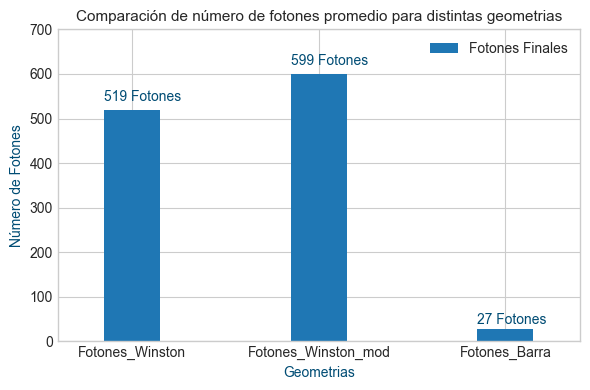

In [1612]:
df_f_mean.plot(x='Geometría', y='Fotones Finales', kind="bar",width=0.3)
plt.tick_params(axis="x", rotation=0, labelsize=10)
plt.rcParams["figure.figsize"] = (6, 4)
plt.xlabel('Geometrias', fontsize=10, horizontalalignment='center', position=(0.5,-0.5), c=txt_color2) # Titulo eje x
plt.ylabel('Número de Fotones', fontsize=10, c=txt_color2) # Titulo eje x
plt.ylim(0,700)
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'
plt.title('Comparación de número de fotones promedio para distintas geometrias', fontsize=11)  # Titulo de la grafica
plt.legend(prop={'size': 10})
plt.text(-0.15,540, '519 Fotones', fontsize = 10, c=txt_color2)
plt.text(0.85,620, '599 Fotones', fontsize = 10, c=txt_color2)
plt.text(1.85,40, '27 Fotones', fontsize = 10, c=txt_color2)

In [1421]:
list=(Winston,Winston_mod,Barra)

In [1422]:
lista_name=['Winston','Winston_mod','Barra']

In [1423]:
df = pd.DataFrame()

In [1424]:
df['Geometría']=lista_name

In [1425]:
df['Energía Promedio']=list

In [1487]:
df

,Geometría,Energía Promedio
0,Winston,2.601073
1,Winston_mod,3.000040
2,Barra,0.136201


Text(1.85, 0.2, '0.136201 [w]')

C:\Users\ccana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


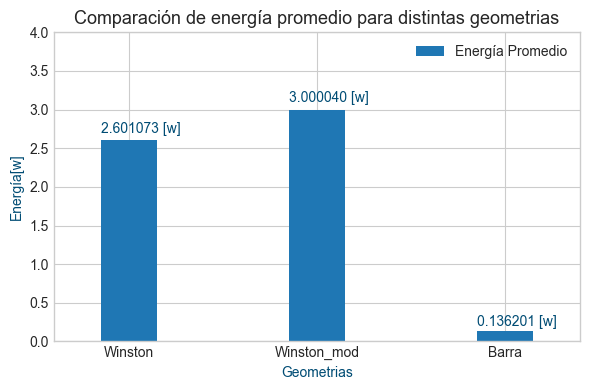

In [1428]:
df.plot(x='Geometría', y='Energía Promedio', kind="bar",width=0.3)
plt.tick_params(axis="x", rotation=0, labelsize=10)
plt.rcParams["figure.figsize"] = (6, 4)
plt.xlabel('Geometrias', fontsize=10, horizontalalignment='center', position=(0.5,-0.5), c=txt_color2) # Titulo eje x
plt.ylabel('Energía[w]', fontsize=10, c=txt_color2) # Titulo eje x
plt.ylim(0,4)
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'
plt.title('Comparación de energía promedio para distintas geometrias', fontsize=13)  # Titulo de la grafica
plt.legend(prop={'size': 10})
plt.text(-0.15,2.7, '2.601073 [w]', fontsize = 10, c=txt_color2)
plt.text(0.85,3.1, '3.000040 [w]', fontsize = 10, c=txt_color2)
plt.text(1.85,0.2, '0.136201 [w]', fontsize = 10, c=txt_color2)

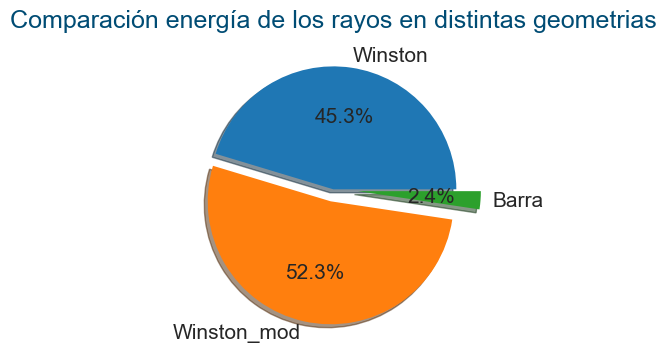

In [1431]:
from tkinter import CENTER


plt.figure(figsize=(4,8))
plt.pie(df['Energía Promedio'],labels= df['Geometría'],shadow=True,autopct='%1.1f%%',explode=[0,0.1,0.2],textprops={'fontsize': 15})
plt.title('Comparación energía de los rayos en distintas geometrias',fontsize=18,loc='center', c=txt_color2)
plt.show()
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'


# winston

#### numero de rayos desaparecidos

In [1011]:
df_1.isnull().sum() 

List1    431
dtype: int64

In [1012]:
df_2.isnull().sum()

List2    177
dtype: int64

In [1013]:
df_3.isnull().sum()

List3    1919
dtype: int64

In [1003]:
data.value_counts()

List1     List2     List3   
0.000000  0.000000  0.000000    177
3.321190  3.321896  0.000000      1
3.321129  3.286414  0.000000      1
3.321123  3.264258  0.000000      1
3.321120  3.324715  0.000000      1
                               ... 
3.298825  3.257021  0.000000      1
3.298804  3.286044  0.000000      1
3.298803  3.298582  0.000000      1
3.298800  3.279127  0.000000      1
3.363255  3.363242  3.363242      1
Length: 1824, dtype: int64

In [60]:
from scipy.optimize import curve_fit

In [61]:
from scipy.stats import norm

import matplotlib.pyplot as plt

431

C:\Users\ccana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


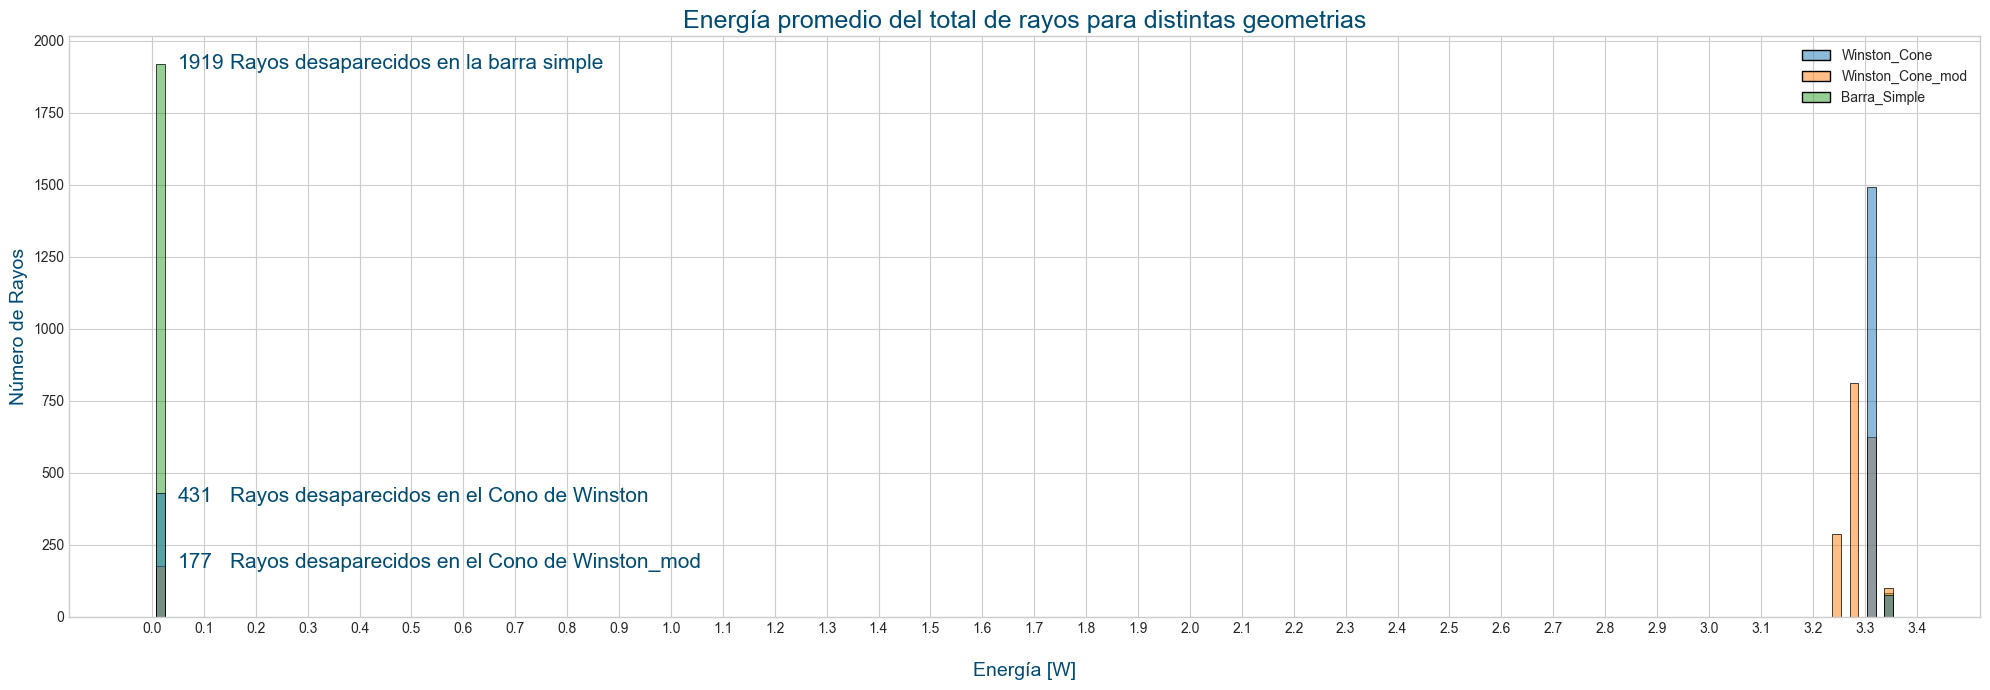

In [1438]:
plt.figure(figsize = (20,7))
sns.histplot(data,bins=100,shrink=0.5, color=('r','a','p'))
plt.xticks(np.arange(0,3.5, 0.1))
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'


plt.xlabel('\nEnergía [W]', c=txt_color2, fontsize=14)
plt.ylabel('Número de Rayos', c=txt_color2, fontsize=14)
plt.title('Energía promedio del total de rayos para distintas geometrias',fontsize=18,loc='center', c=txt_color2)
plt.tight_layout()
plt.text(0.05,1900,1919, fontsize = 15, c=txt_color2)
plt.text(0.15,1900,'Rayos desaparecidos en la barra simple', fontsize = 15, c=txt_color2)
plt.text(0.05,170,177, fontsize = 15, c=txt_color2)
plt.text(0.15,170,'Rayos desaparecidos en el Cono de Winston_mod', fontsize = 15, c=txt_color2)
plt.text(0.05,400,431, fontsize = 15, c=txt_color2)
plt.text(0.15,400,'Rayos desaparecidos en el Cono de Winston', fontsize = 15, c=txt_color2)




In [378]:
data['List1'].max(), data['List2'].max(),data['List3'].max() 

(3.363255446588808, 3.363260676054719, 3.3632467459030746)

C:\Users\ccana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


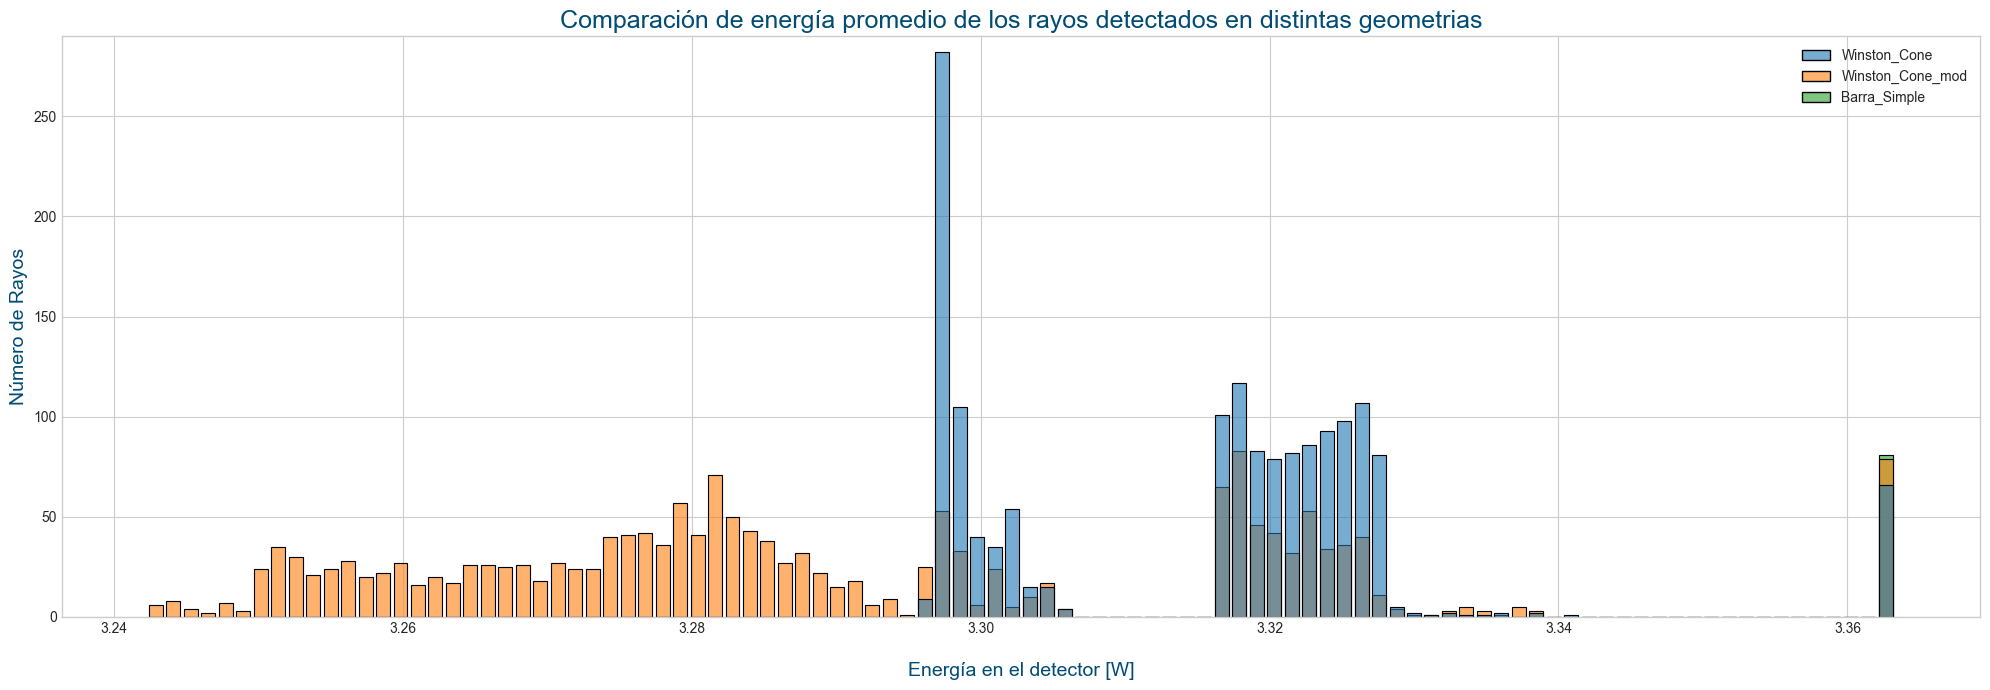

In [1439]:
plt.figure(figsize = (20,7))
sns.histplot(df_,bins=100,shrink=0.8,alpha=0.6)
plt.ylim(0,290)
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'


plt.xlabel('\nEnergía en el detector [W]', c=txt_color2, fontsize=14)
plt.ylabel('Número de Rayos', c=txt_color2, fontsize=14)
plt.title('Comparación de energía promedio de los rayos detectados en distintas geometrias',fontsize=18,loc='center', c=txt_color2)
plt.tight_layout()



C:\Users\ccana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


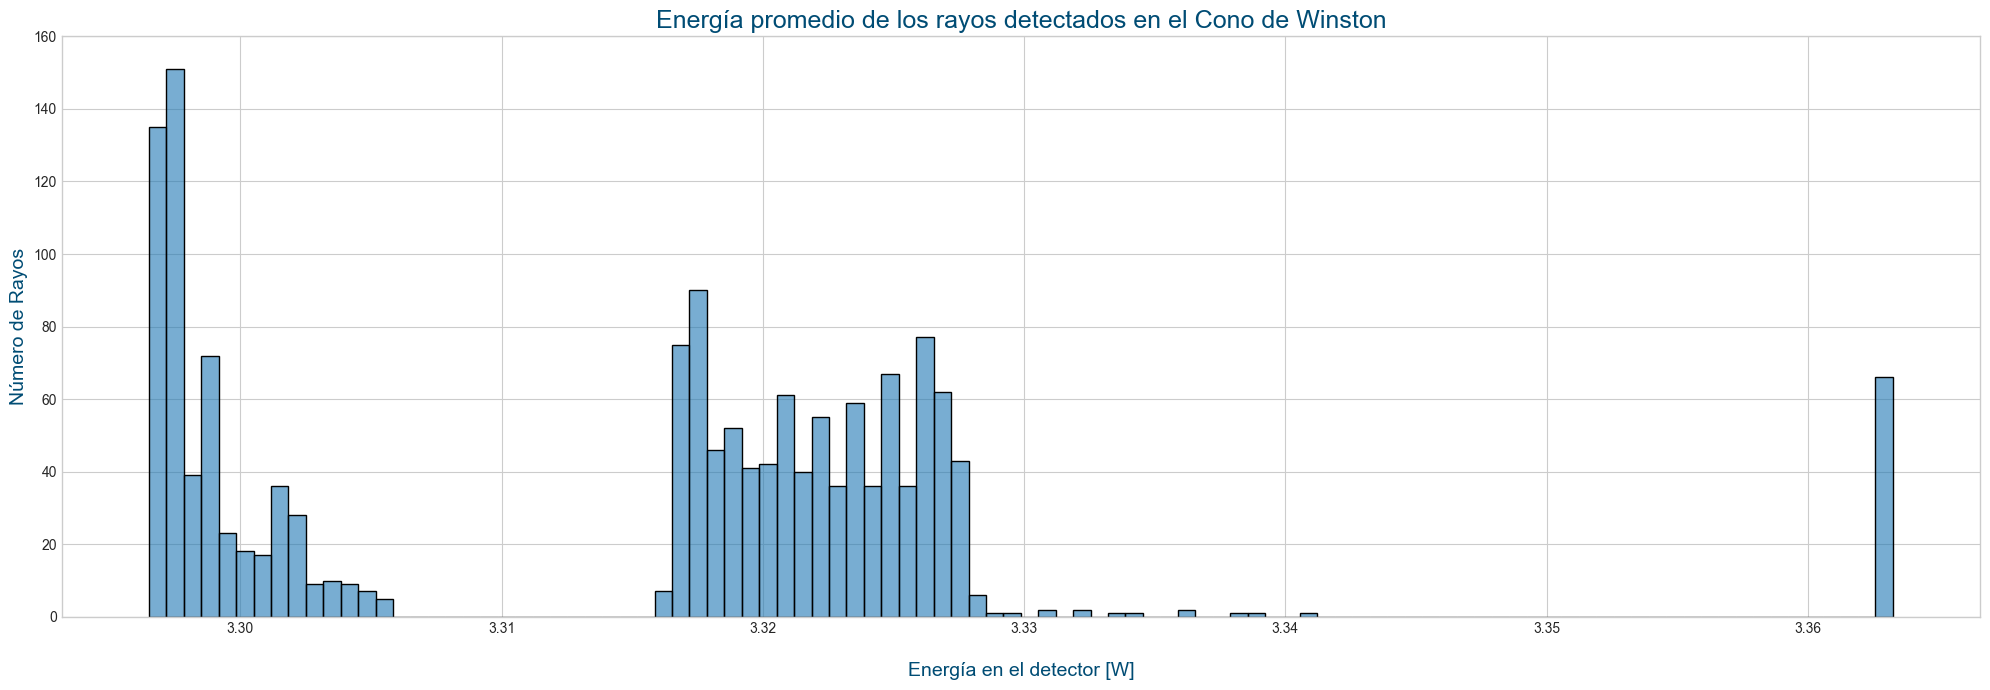

In [1440]:
plt.figure(figsize = (20,7))
sns.histplot(data=df_1, x='List1',bins=100,alpha=0.6)
plt.ylim(0,160)
#plt.xlim(3.29,3.37)
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'


plt.xlabel('\nEnergía en el detector [W]', c=txt_color2, fontsize=14)
plt.ylabel('Número de Rayos', c=txt_color2, fontsize=14)
plt.title('Energía promedio de los rayos detectados en el Cono de Winston',fontsize=18,loc='center', c=txt_color2)
plt.tight_layout()





## winston_mod

#### numero de rayos desaparecidos

In [68]:
df_2.isnull().sum()

List2    177
dtype: int64

C:\Users\ccana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


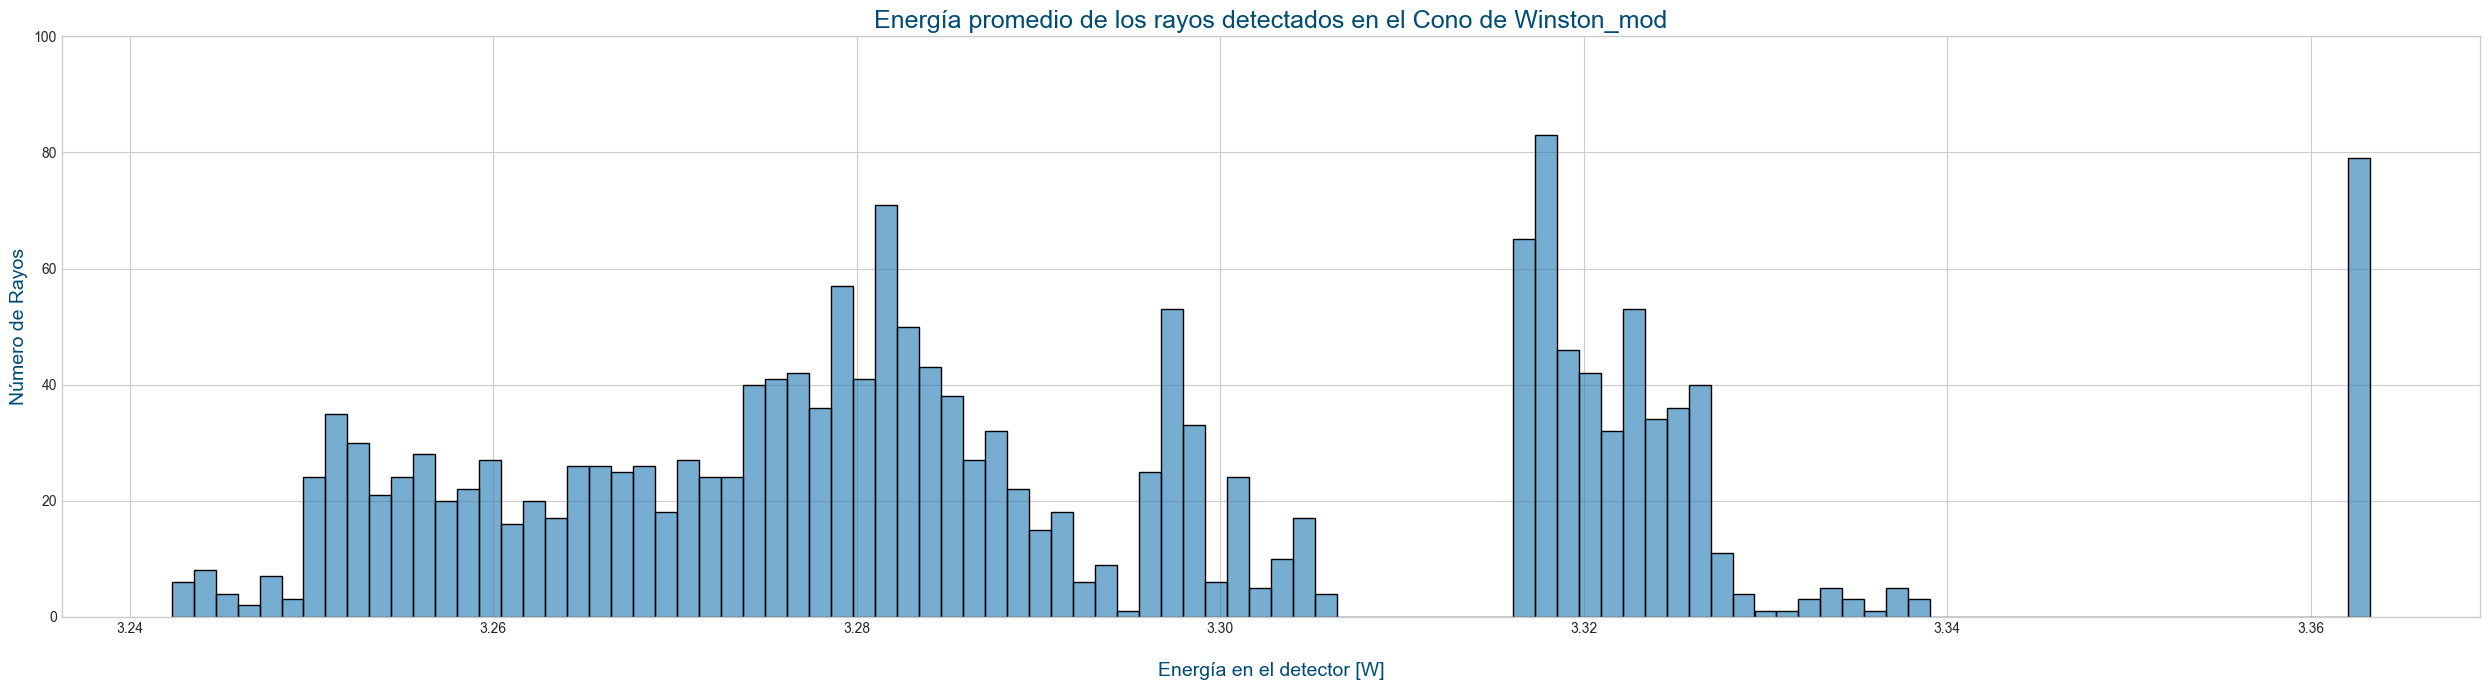

In [919]:
plt.figure(figsize = (25,7))
sns.histplot(data=df_2, x='List2',bins=100,alpha=0.6)
plt.ylim(0,100)
#plt.xlim(3.24,3.37)
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'


plt.xlabel('\nEnergía en el detector [W]', c=txt_color2, fontsize=14)
plt.ylabel('Número de Rayos', c=txt_color2, fontsize=14)
plt.title('Energía promedio de los rayos detectados en el Cono de Winston_mod',fontsize=18,loc='center', c=txt_color2)
plt.tight_layout()


## barra

#### numero de rayos desaparecidos

In [205]:
df_3.isnull().sum()

List3                   1914
numerador desviacion    1914
dtype: int64

In [928]:
df_3.max()

List3    3.363247
dtype: float64

C:\Users\ccana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


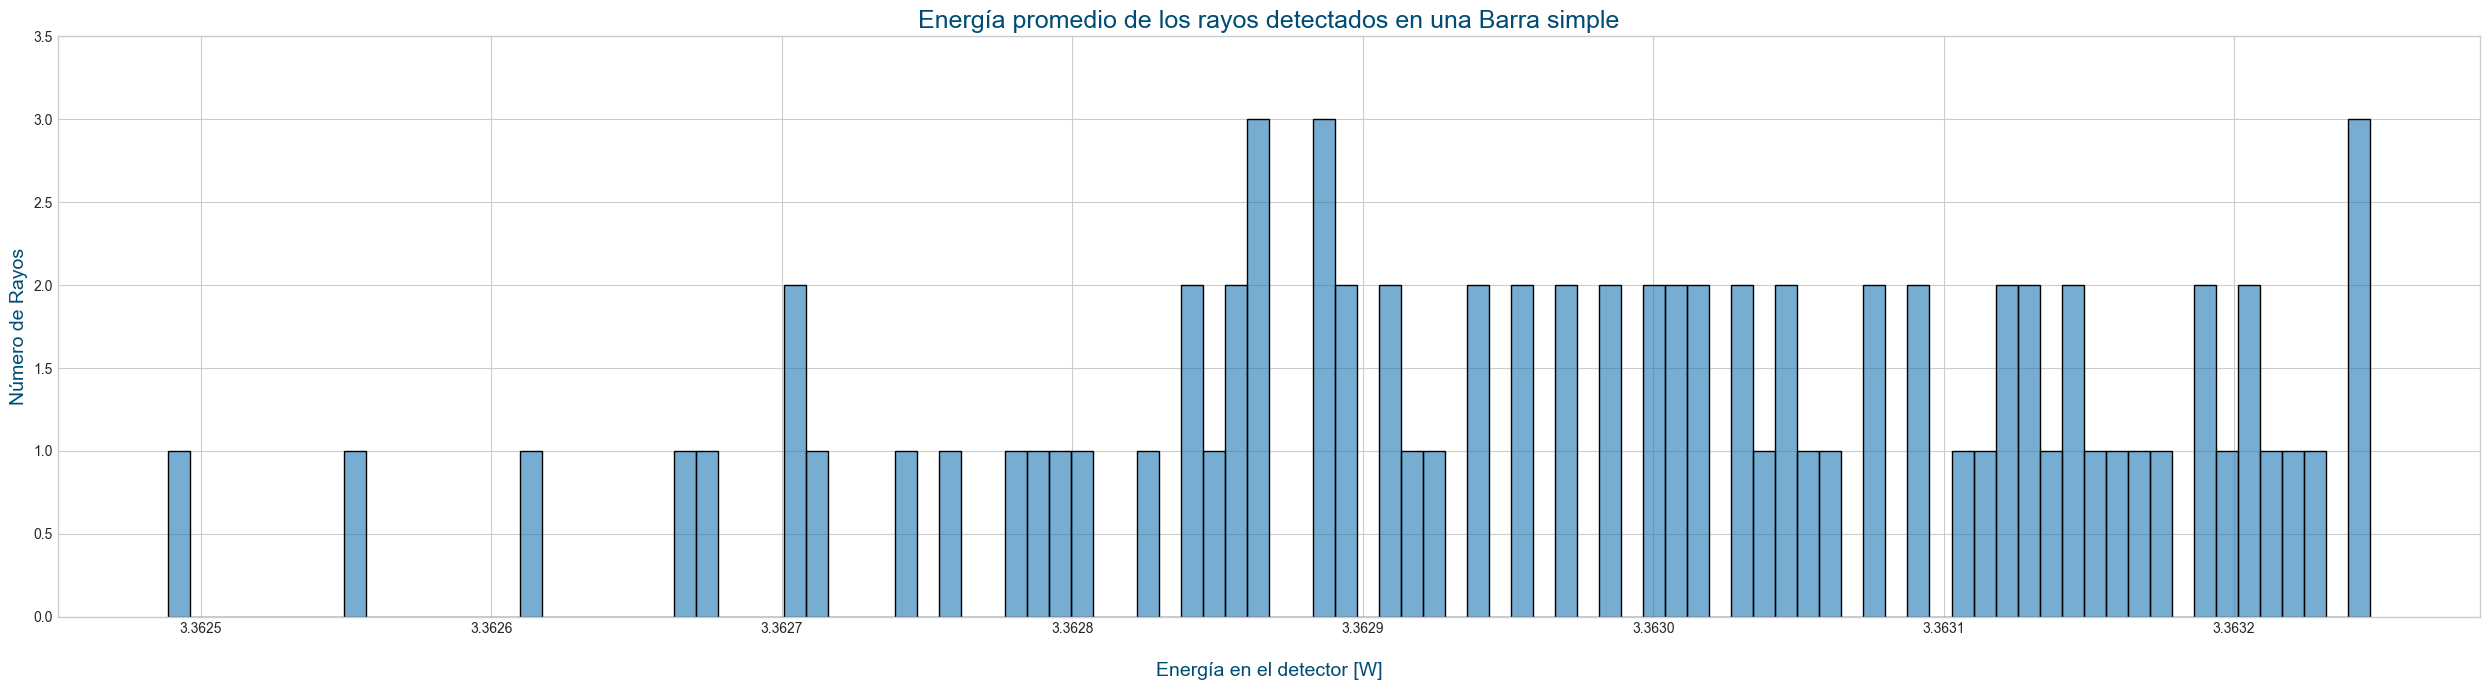

In [941]:
plt.figure(figsize = (25,7))
sns.histplot(df_3, x='List3',bins=100,alpha=0.6)
plt.ylim(0,3.5)
#plt.xlim(3.24,3.37)
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'
#plt.xticks(np.arange(3.362489,3.363247, 0.00005))

plt.xlabel('\nEnergía en el detector [W]', c=txt_color2, fontsize=14)
plt.ylabel('Número de Rayos', c=txt_color2, fontsize=14)
plt.title('Energía promedio de los rayos detectados en una Barra simple',fontsize=18,loc='center', c=txt_color2)
plt.tight_layout()


In [77]:
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec

([<matplotlib.axis.XTick at 0x23927f7b5e0>,
 [Text(3.23999, 0, '3.240'),
  Text(3.24499, 0, '3.245'),
  Text(3.24999, 0, '3.250'),
  Text(3.25499, 0, '3.255'),
  Text(3.2599899999999997, 0, '3.260'),
  Text(3.2649899999999996, 0, '3.265'),
  Text(3.2699899999999995, 0, '3.270'),
  Text(3.2749899999999994, 0, '3.275'),
  Text(3.2799899999999993, 0, '3.280'),
  Text(3.284989999999999, 0, '3.285'),
  Text(3.289989999999999, 0, '3.290'),
  Text(3.294989999999999, 0, '3.295'),
  Text(3.299989999999999, 0, '3.300'),
  Text(3.3049899999999988, 0, '3.305'),
  Text(3.3099899999999987, 0, '3.310'),
  Text(3.3149899999999985, 0, '3.315'),
  Text(3.3199899999999984, 0, '3.320'),
  Text(3.3249899999999983, 0, '3.325'),
  Text(3.3299899999999982, 0, '3.330'),
  Text(3.334989999999998, 0, '3.335'),
  Text(3.339989999999998, 0, '3.340'),
  Text(3.344989999999998, 0, '3.345'),
  Text(3.349989999999998, 0, '3.350'),
  Text(3.3549899999999977, 0, '3.355'),
  Text(3.3599899999999976, 0, '3.360'),
  Text(3

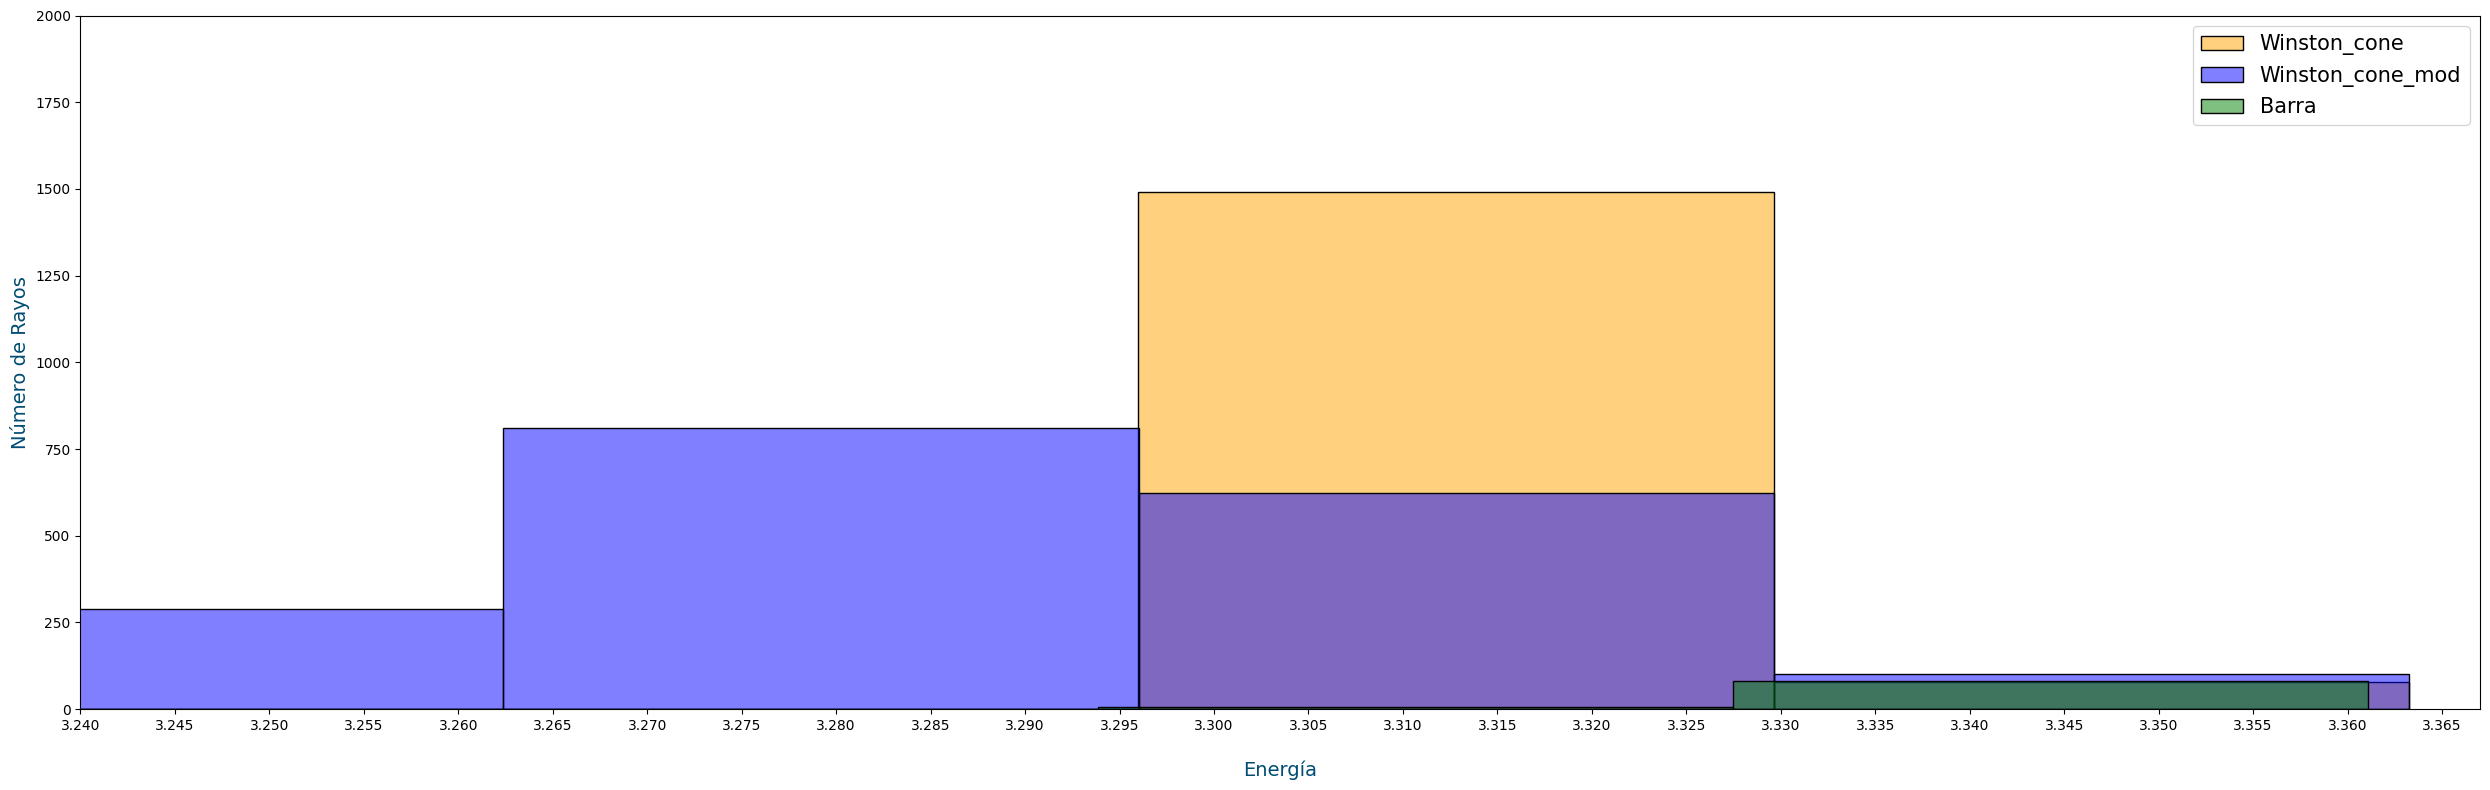

In [143]:
plt.figure(figsize = (25,8))
sns.histplot(data=data, x='List1', kde=False,bins=100,alpha=0.5,color='orange',label="Winston_cone",line_kws = {'color':'red','linestyle': 'dashed'},multiple="stack")
sns.histplot(data=data, x='List2', kde=False,bins=100,alpha=0.5,color='blue',label='Winston_cone_mod',multiple="stack")
sns.histplot(data=data, x='List3',kde=False,bins=100,alpha=0.5,color='green',label='Barra',multiple="stack")
plt.ylim(0,2000)
plt.legend(prop={'size': 15})
facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'
plt.xlabel('\nEnergía', c=txt_color2, fontsize=14)
plt.ylabel('Número de Rayos', c=txt_color2, fontsize=14)
plt.tight_layout()
plt.savefig('costs.png', facecolor=facecolor)
plt.xlim(3.23999,3.367)
plt.xticks(np.arange(3.23999,3.367, 0.005))



C:\Users\ccana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


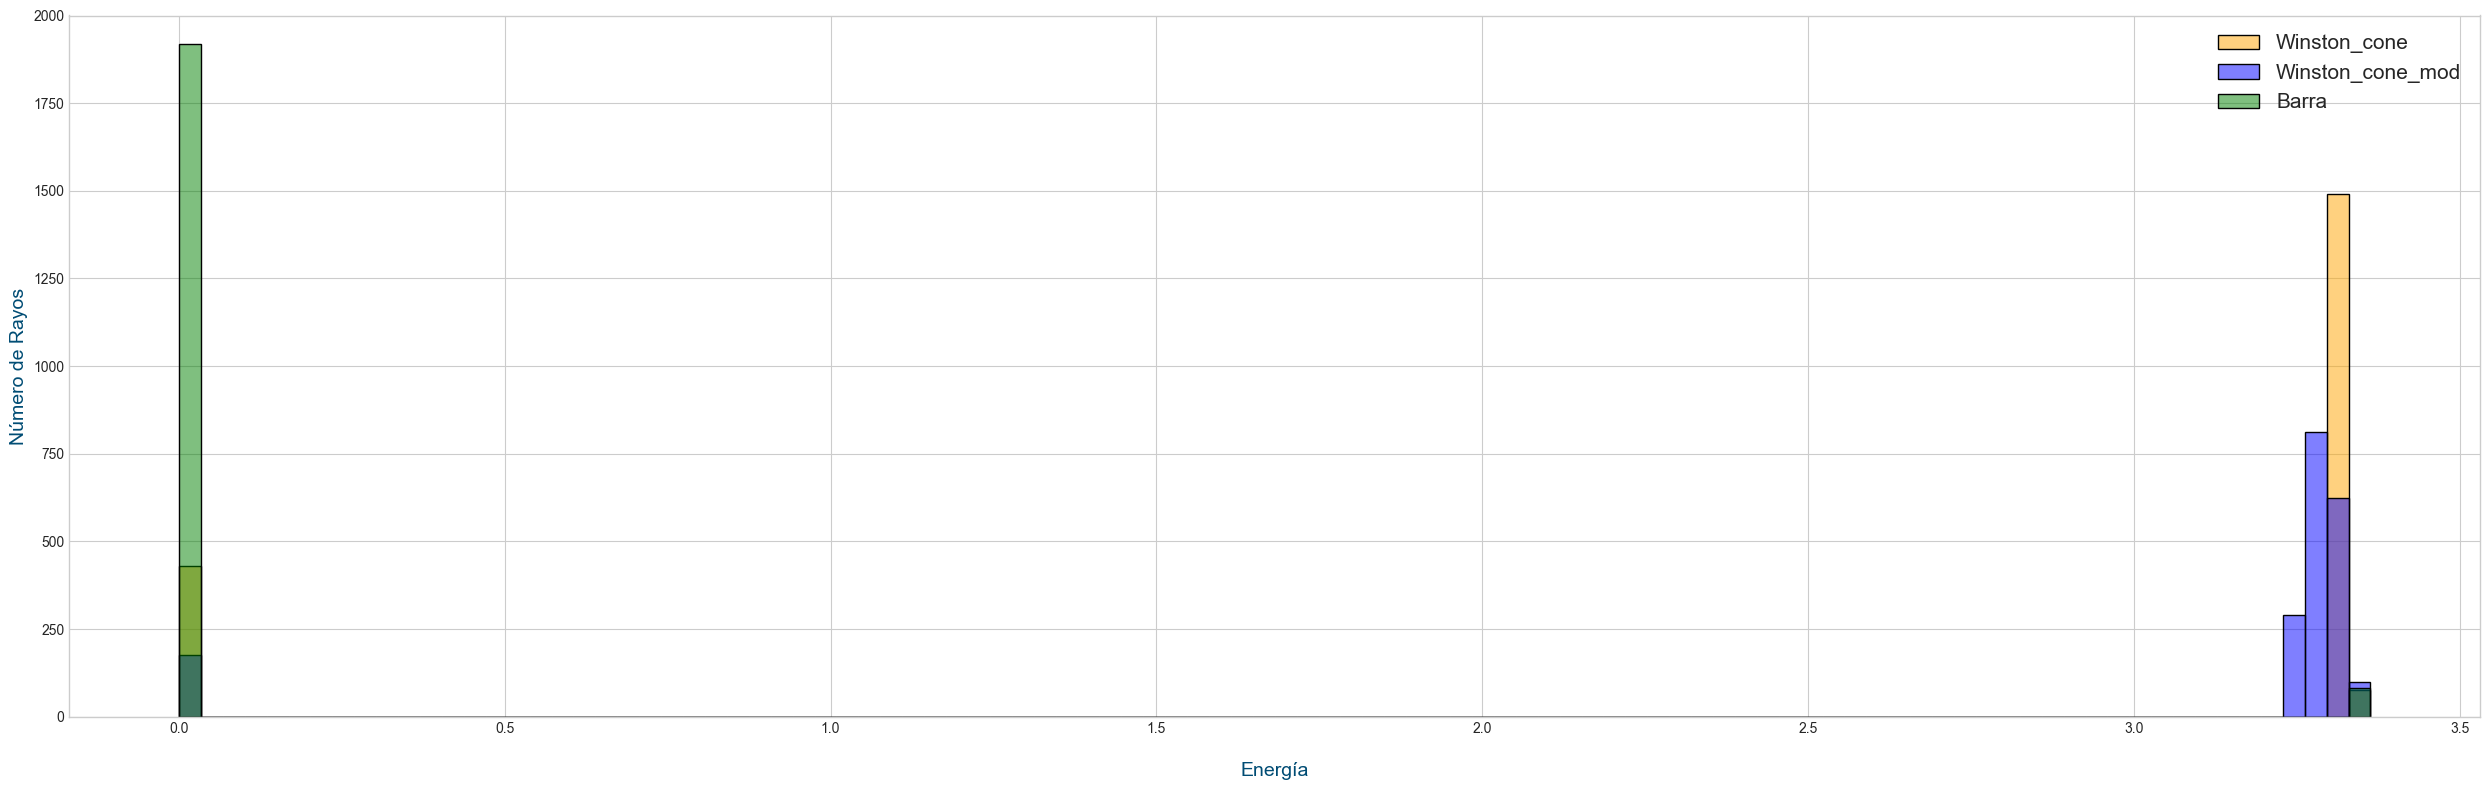

In [885]:
plt.figure(figsize = (25,8))
sns.histplot(data=data, x='List1', kde=False,bins=100,alpha=0.5,color='orange',label="Winston_cone",line_kws = {'color':'red','linestyle': 'dashed'},multiple="stack")
sns.histplot(data=data, x='List2', kde=False,bins=100,alpha=0.5,color='blue',label='Winston_cone_mod',multiple="stack")
sns.histplot(data=data, x='List3',kde=False,bins=100,alpha=0.5,color='green',label='Barra',multiple="stack")
plt.ylim(0,2000)
plt.legend(prop={'size': 15})
#plt.xticks(range(0, 3))

#plt.xlim(3.23999,3.367)
#data['List1'][0][3].set_xlim((0,1))
#ax_list[0][1].set_xlim((0.01, 0.07))
x_min, x_max = plt.xlim()

facecolor = '#EAEAEA'
color_bars = '#3475D0'
txt_color1 = '#252525'
txt_color2 = '#004C74'


plt.xlabel('\nEnergía', c=txt_color2, fontsize=14)
plt.ylabel('Número de Rayos', c=txt_color2, fontsize=14)
plt.tight_layout()

In [687]:
data['List1'].max()

3.363255446588808

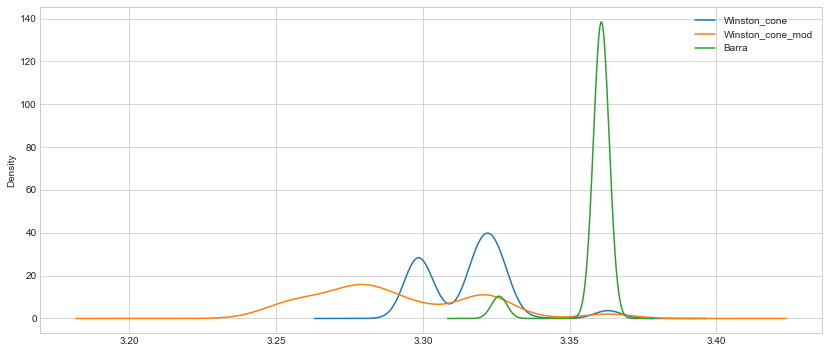

In [91]:
plt.figure(figsize = (14,6))
df_1['List1'].plot.kde(bw_method=0.3,label="Winston_cone")
df_2['List2'].plot.kde(bw_method=0.3,label='Winston_cone_mod')
df_3['List3'].plot.kde(bw_method=0.3,label='Barra')
plt.legend()